<a href="https://colab.research.google.com/github/msafdar96/inse6220/blob/main/6220%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install pycaret==3.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [377]:
df = pd.read_csv('https://raw.githubusercontent.com/msafdar96/inse6220/main/heart.csv',nrows=250)
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [352]:
sns.pairplot(df, hue='output')
plt.show()

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f1532e0e5f0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 54, in _cb
    def _cb(arg):
KeyboardInterrupt: 


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f157f1a1870> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f157f1a0af0> (for post_execute):


KeyboardInterrupt: ignored

In [399]:
X = df.drop(columns=['output','fbs','chol','sex','exng','caa','thall','restecg','cp'])
X.head(10)

,age,trtbps,thalachh,oldpeak,slp
0,63,145,150,2.3,0
1,37,130,187,3.5,0
2,41,130,172,1.4,2
3,56,120,178,0.8,2
4,57,120,163,0.6,2
5,57,140,148,0.4,1
6,56,140,153,1.3,1
7,44,120,173,0.0,2
8,52,172,162,0.5,2
9,57,150,174,1.6,2


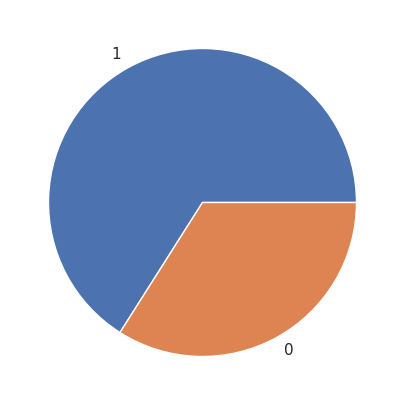

In [400]:
y =df['output']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [401]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,250.0,54.0800,9.381773,29.0,47.00,54.5,61.0,77.0
trtbps,250.0,131.3920,17.399116,94.0,120.00,130.0,140.0,200.0
thalachh,250.0,152.4720,21.852766,88.0,140.25,156.0,169.0,202.0
oldpeak,250.0,0.9448,1.108054,0.0,0.00,0.6,1.5,6.2
slp,250.0,1.4360,0.625676,0.0,1.00,2.0,2.0,2.0


In [402]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,age,trtbps,thalachh,oldpeak,slp
0,0.952687,0.783678,-0.113348,1.225498,-2.299723
1,-1.824203,-0.080165,1.583198,2.310650,-2.299723
2,-1.396989,-0.080165,0.895409,0.411634,0.903234
3,0.205063,-0.656059,1.170525,-0.130942,0.903234
4,0.311866,-0.656059,0.482736,-0.311800,0.903234
5,0.311866,0.495730,-0.205053,-0.492659,-0.698245
6,0.205063,0.495730,0.024210,0.321205,-0.698245
7,-1.076579,-0.656059,0.941262,-0.854376,0.903234
8,-0.222151,2.338593,0.436884,-0.402230,0.903234
9,0.311866,1.071625,0.987115,0.592493,0.903234


In [403]:
observations = list(df.index)
variables = list(df.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


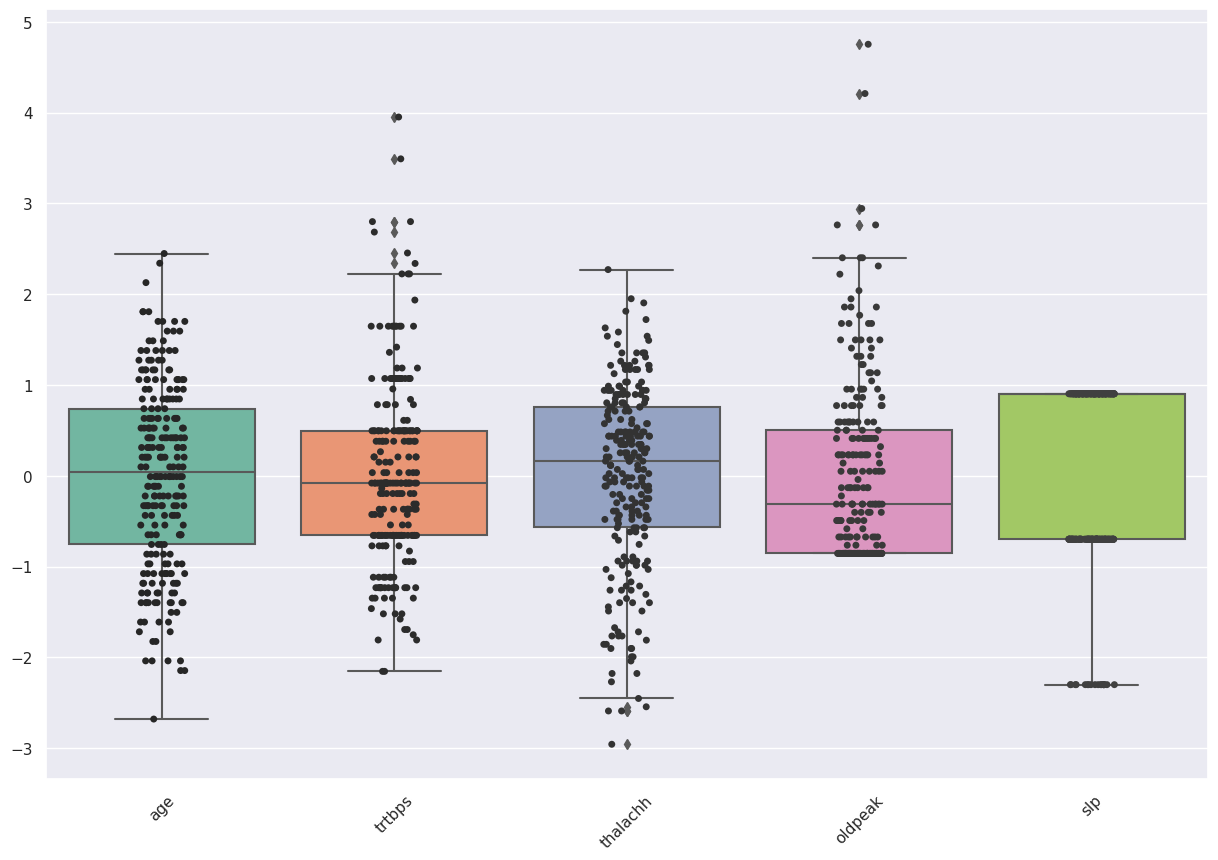

In [404]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
     

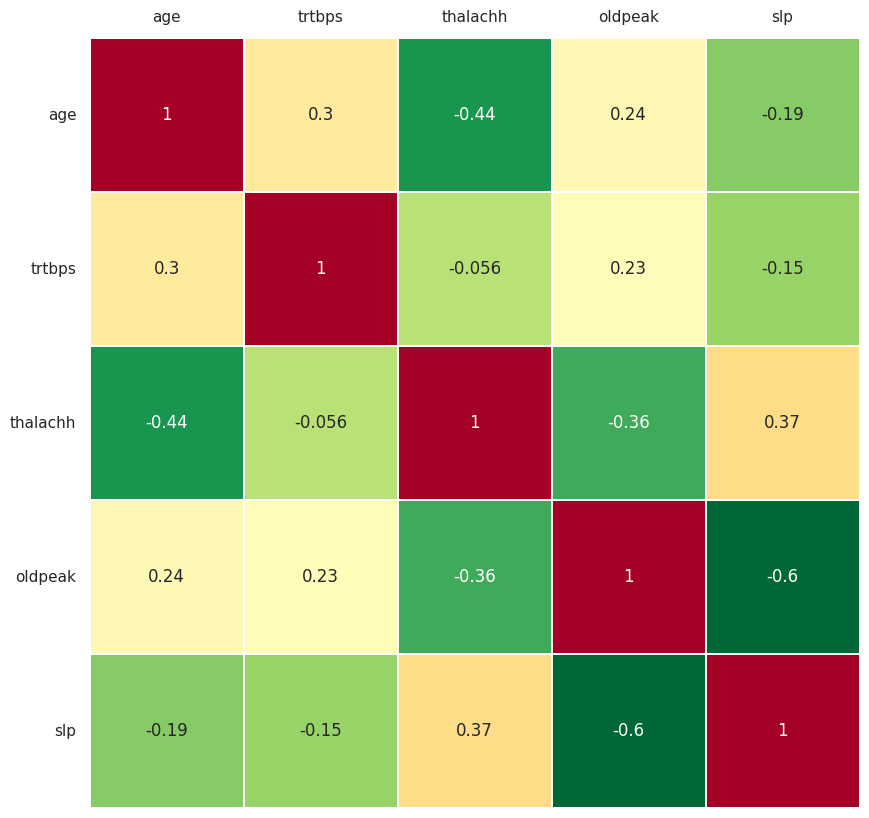

In [405]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

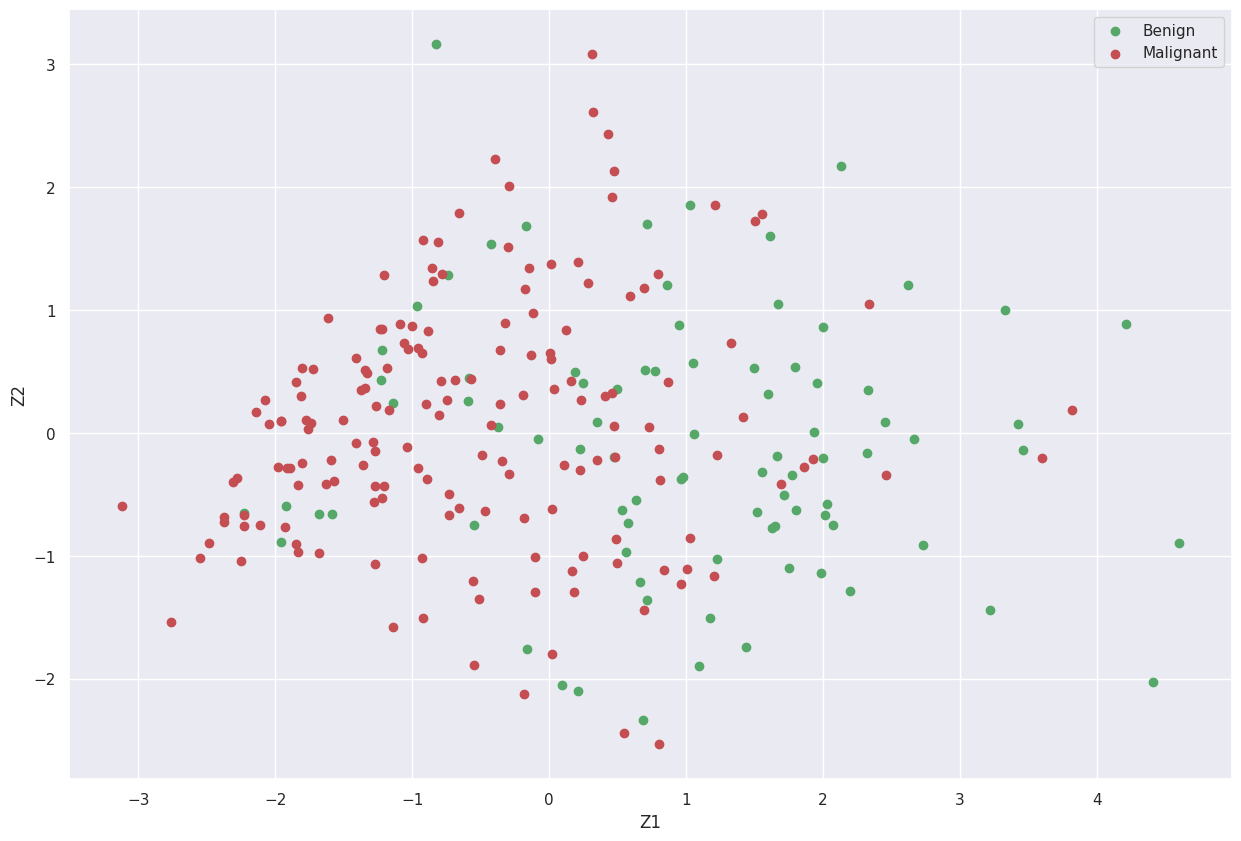

In [406]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[ 0.42265868,  0.51188726, -0.42695473, -0.60417034,  0.10963089],
       [ 0.28464578,  0.67683676,  0.55679058,  0.38634611,  0.03987115],
       [-0.47116945,  0.08389249,  0.58096461, -0.64869812,  0.11239336],
       [ 0.51839058, -0.30207907,  0.3224491 , -0.2462696 , -0.68949061],
       [-0.49960682,  0.42611467, -0.2572948 ,  0.06524501, -0.70594744]])

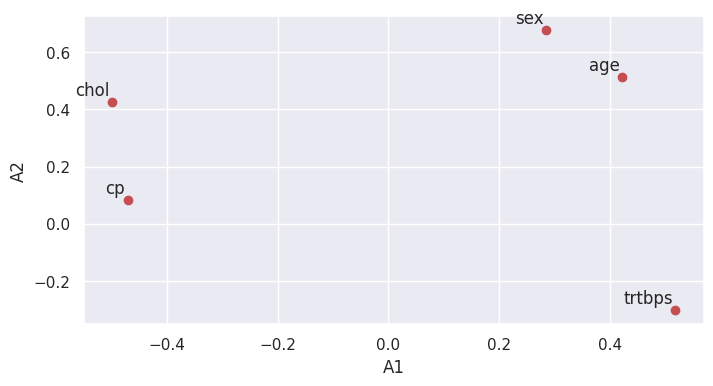

In [407]:

A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

array([2.22728576, 1.03292774, 0.91094032, 0.45103755, 0.39788895])

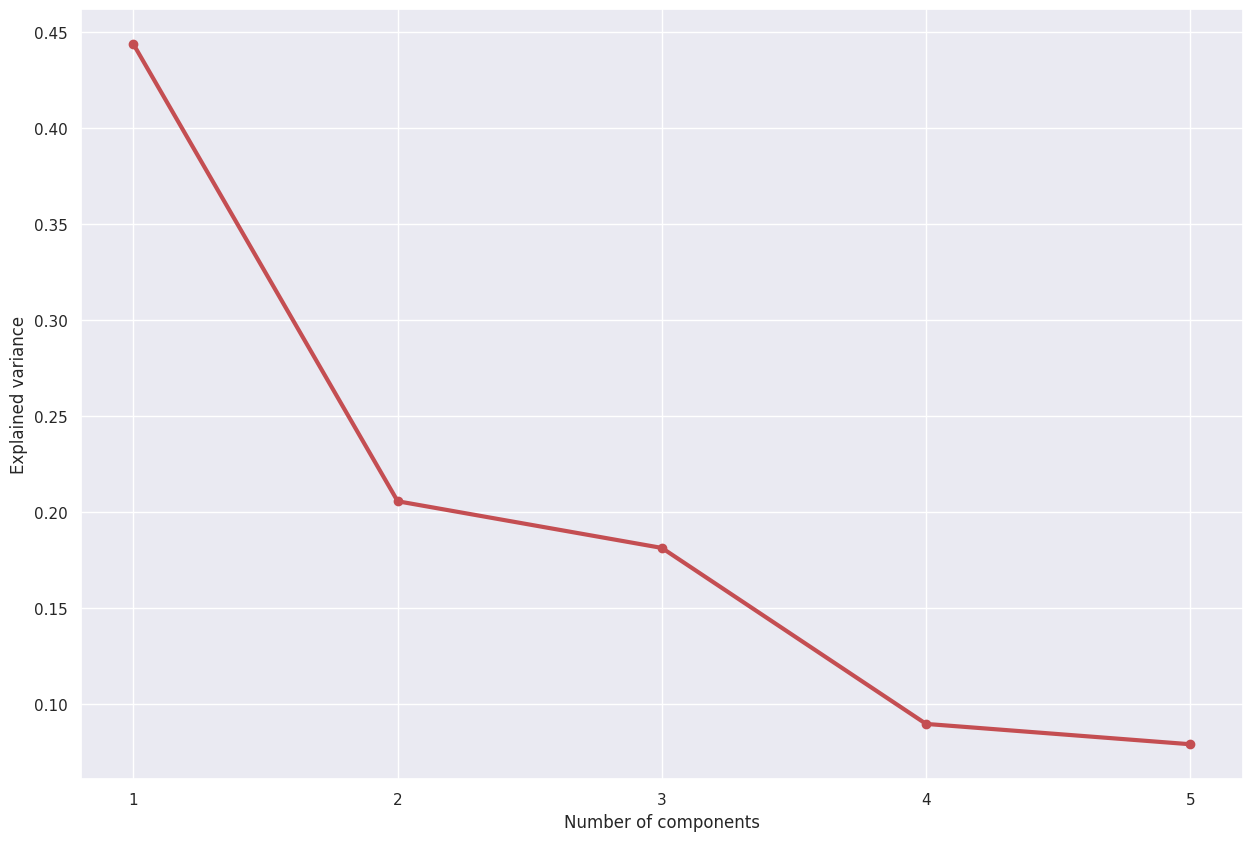

In [408]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

In [ ]:
out['PC']

In [ ]:
model.scatter(label=True, legend=False)

In [ ]:
A = out['loadings'].T
A

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

In [ ]:
from pycaret.utils import version
version()

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

In [ ]:
#show the best model and their statistics
best_model = compare_models()